In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# %pip install squarify
import squarify

from FileUtilities import get_source_file_metrics

path = 'C:/dev/OpenRA/'
'Working with files at ' + path

'Working with files at C:/dev/OpenRA/'

In [2]:
files = get_source_file_metrics(path)
files[:1]

[{'path': 'OpenRA.Game\\Activities',
  'filename': 'Activity.cs',
  'ext': '.cs',
  'lines': 291,
  'project': 'OpenRA.Game'}]

In [4]:
df = pd.DataFrame(files)
df = df.sort_values('lines', ascending=False)
df.head()

,path,filename,ext,lines,project
0,OpenRA.Game\Activities,Activity.cs,.cs,291,OpenRA.Game
1,OpenRA.Game\Activities,CallFunc.cs,.cs,33,OpenRA.Game
2,OpenRA.Game,Actor.cs,.cs,645,OpenRA.Game
3,OpenRA.Game,CacheStorage.cs,.cs,20,OpenRA.Game
4,OpenRA.Game,CPos.cs,.cs,150,OpenRA.Game


In [6]:
df.describe()

,lines
count,1358.000000
mean,137.072165
std,146.205121
min,18.000000
25%,56.000000
50%,88.000000
75%,160.000000
max,1400.000000


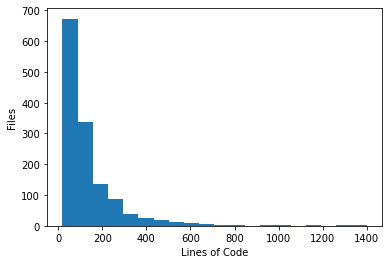

In [7]:
# Histogram of lines of code
df.plot.hist(bins=20, legend=False)
plt.xlabel("Lines of Code")
plt.ylabel("Files")
None

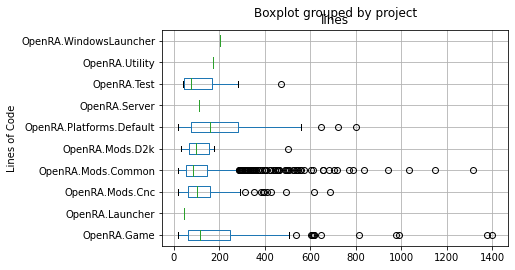

In [8]:
df.boxplot(column=['lines'],by='project',vert=False)
plt.ylabel("Lines of Code")
plt.xlabel(None)
None

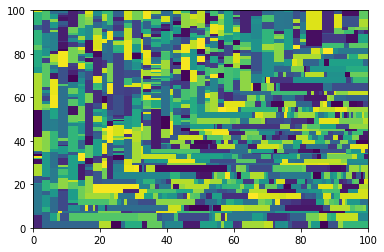

In [12]:
squarify.plot(sizes=df['lines'])
plt.show()